# Laboratory 6 - Parser & Building an AST

In [1]:
import graphviz
from parser import parser
from utils import render_ast_diagram

Function to generate an Abstract Syntax Tree (AST) from a given input string, along with a graphiz visualization of it.

In [2]:
def generate_ast(input):
    result = parser.parse(input)

    graph = graphviz.Digraph(node_attr={'shape': 'box', 'style': 'rounded', 'fontname': 'Helvetica'})
    render_ast_diagram(result, graph)

    return result, graph

## Basic Usage

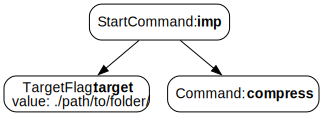

In [3]:
inp = 'imp --target="./path/to/folder/" compress'
_, graph = generate_ast(inp)
graph

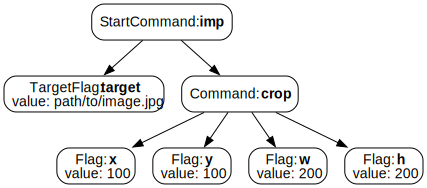

In [4]:
inp = 'imp --target="path/to/image.jpg" crop --x=100 --y=100 --w=200 --h=200'
ast, graph = generate_ast(inp)
graph

## With Pipelines

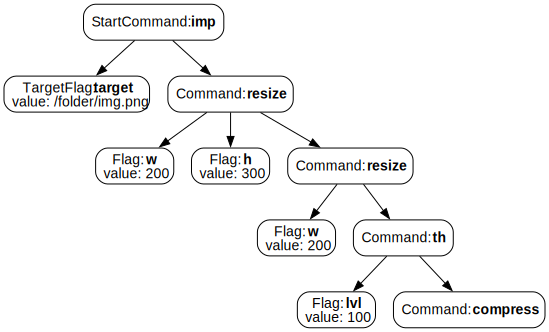

In [5]:
inp = 'imp --target="/folder/img.png" resize --w=200 --h=300 -> resize --w=200 -> th --lvl=100 -> compress'
_, graph = generate_ast(inp)
graph

## Error Handling

The lexer also prints an error message and stops the program if it encounters an invalid token.

In [6]:
inp = 'imp --target="/folder/img.png" resiz --w=200 --h=300'
result = generate_ast(inp)

Unknown command 'resiz' at position 31


For other types of errors, the parser will print the message and stop parsing the input.

In the example below, the target argument should precede all the other commands. The parser will print the error message and stop parsing the input.

In [7]:
inp = 'imp resize --target="/folder/img.png" --w=200 --h=300'
result = generate_ast(inp)

Syntax error at token 'resize'


The pipeline command must be followed by a valid command. The parser will print the error message and stop parsing the input.

In [8]:
inp = 'imp --target="/folder/img.png" compress ->'
result = generate_ast(inp)

Syntax error at EOF
